In [54]:
# File: simple_linear_regression.ipynb

# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler #

In [30]:


file_path = 'Housing.csv'  # Replace with your file path
cleaned_file_path = 'Housing_cleaned.csv' #Path to save the updated file

try:
    data = pd.read_csv(file_path)

    # Identify columns that need conversion (assuming they are of type 'object')
    for col in data.columns:
        if data[col].dtype == 'object': # Check if the column is of type 'object' (string)
            data[col] = data[col].map({'yes': 1, 'no': 0})


    # Save the updated DataFrame to a new CSV file
    data.to_csv(cleaned_file_path, index=False)
    print(f"CSV file updated and saved to: {cleaned_file_path}")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")



CSV file updated and saved to: D:/downloads/archive(4)/Housing_cleaned.csv


In [48]:

# Step 2: Load the Dataset
file_path = 'Housing_cleaned.csv'  # Replace with your file path
data = pd.read_csv(file_path)


In [49]:

# Step 3: Data Exploration
print("First few rows of the dataset:")
print(data.head())

print("\nData Information:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())


First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  



In [50]:

# Step 4: Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values (if any)
# In this case, we'll drop rows with missing values
data = data.dropna()



Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


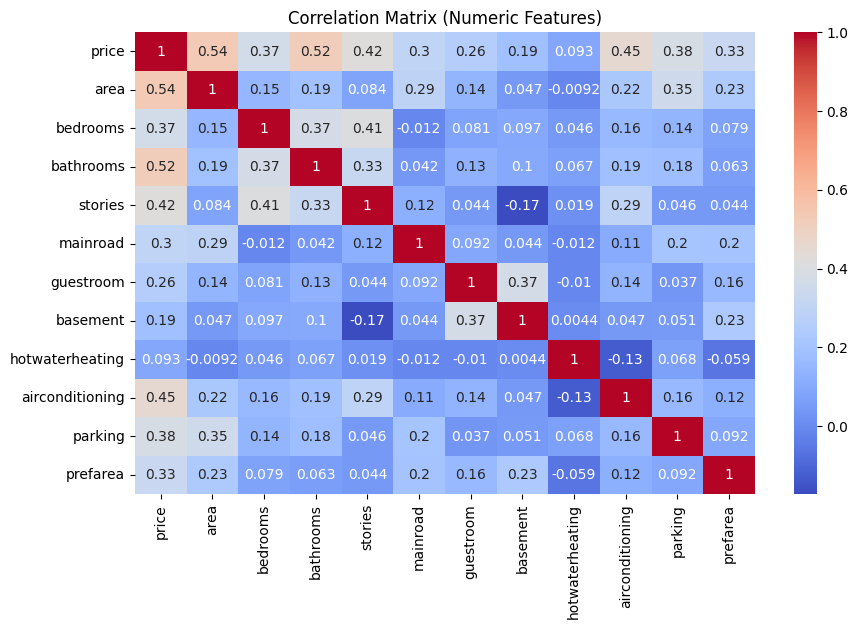

In [51]:
numeric_data = data.select_dtypes(include=np.number) #Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()



In [55]:
#1. Convert categorical features to numerical using Label Encoding
categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [56]:
#2. Separate features (X) and target (y)
X = data.drop('price', axis=1)
y = data['price']

In [57]:
#3. Scale numerical features using StandardScaler (Improves model performance)
scaler = StandardScaler()
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] #List numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])



In [58]:
# Step 7: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state for reproducibility


In [59]:
# Step 8: Model Development
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [60]:
# Step 9: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")




Model Evaluation Metrics:
Mean Squared Error (MSE): 1771751116594.0396
R-squared (R2): 0.6494754192267795


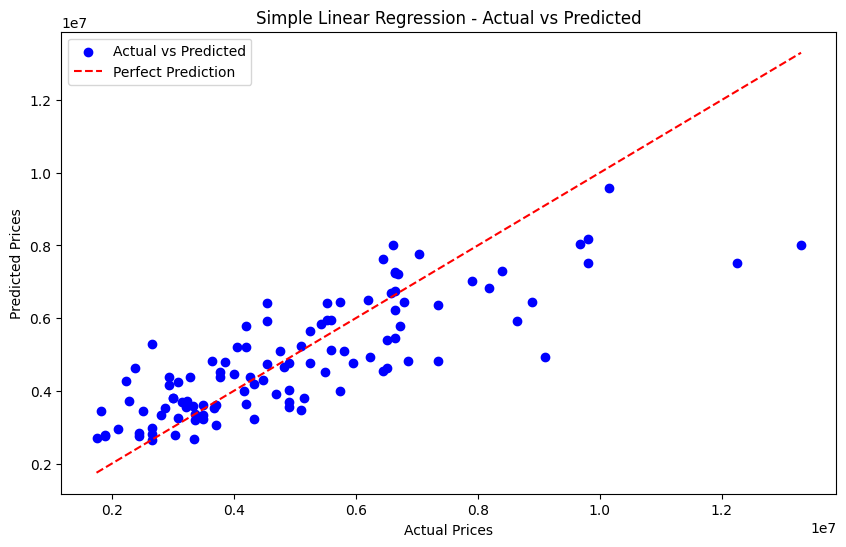

In [61]:
# Step 10: Visualization (Improved)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted') #Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction') #Line of perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Simple Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()

In [62]:
# Step 11: Model Coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}") #Note: coef_ is an array of coefficients for each feature




Model Coefficients:
Intercept: 4041988.124172001
Coefficients: [ 511355.31486431   57939.76418471  550762.10873532  352072.08634443
  366824.19239248  233146.76562655  393159.77872584  687881.31095702
  785550.57929543  194330.06533066  629901.66084591 -210397.11827156]


In [63]:
# Calculate Percentage Accuracy
accuracy = 100 - (np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print("Percentage Accuracy:", accuracy, "%")

Percentage Accuracy: 78.69293212407148 %
